In [6]:
#importing all required libraries
import pandas as pd
import requests
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
# selecting k best features using chi2 /chi-square.
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
import datetime  
from datetime import date
normalizer = preprocessing.Normalization()
import imblearn
from imblearn.under_sampling import RandomUnderSampler

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential 
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense 

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
np.random.seed(7)  # get repeatable outputs

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
# 2.Get the data from online website
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "b68cb71b-44a7-4394-97e2-5d2f41462a5d"}
package = requests.get(url, params = params).json()
data = (package["result"])
datasetUrl = data['resources']
urlLinks = [item['url'] for item in datasetUrl]


In [8]:
# myData = requests.get('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b68cb71b-44a7-4394-97e2-5d2f41462a5d/resource/4f115333-57c9-445c-a769-9b831798b314/download/ttc-streetcar-delay-data-2014.xlsx')

# read the online excel sheet data into dataframes

metaData = pd.read_excel(urlLinks[0],sheet_name=None)
df2014 = pd.concat(pd.read_excel(urlLinks[1],sheet_name=None),ignore_index=True)
df2015 = pd.concat(pd.read_excel(urlLinks[2],sheet_name=None),ignore_index=True)
df2016 = pd.concat(pd.read_excel(urlLinks[3],sheet_name=None),ignore_index=True)
df2017 = pd.concat(pd.read_excel(urlLinks[4],sheet_name=None),ignore_index=True)
df2018 = pd.concat(pd.read_excel(urlLinks[5],sheet_name=None),ignore_index=True)
df2019 = pd.concat(pd.read_excel(urlLinks[6],sheet_name=None),ignore_index=True)
df2020 = pd.concat(pd.read_excel(urlLinks[7],sheet_name=None),ignore_index=True)

# display the meta data of the dataset
metaData

{'Sheet1':     Field Name  ...              Example
 0  Report Date  ...  2017-06-20 00:00:00
 1        Route  ...                   51
 2         Time  ...             00:35:00
 3          Day  ...               Monday
 4     Location  ...   York Mills Station
 5     Incident  ...           Mechanical
 6    Min Delay  ...                   10
 7      Min Gap  ...                   20
 8    Direction  ...                    N
 9      Vehicle  ...                 1057
 
 [10 rows x 3 columns]}

In [9]:
# checking 2019 data, and it has some extra columns// unneccesary data
df2019.head(3)

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Incident ID,Delay,Gap
0,2019-01-01,301,01:08:00,Tuesday,Queen/Braodview,Held By,6.0,13.0,E/B,4193.0,NaN,NaN,NaN
1,2019-01-01,511,01:30:00,Tuesday,Bathurst/College,Investigation,5.0,10.0,N/B,1038.0,NaN,NaN,NaN
2,2019-01-01,306,01:40:00,Tuesday,Dundas West stn.,Mechanical,8.0,16.0,W/B,4146.0,NaN,NaN,NaN


In [10]:
df2020.head()

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle
0,2020-01-01,504,01:23:00,Wednesday,King and Dufferin,Mechanical,8.0,16.0,E/B,4446.0
1,2020-01-01,512,04:40:00,Wednesday,Queen/Parliament,Mechanical,23.0,46.0,W/B,4541.0
2,2020-01-01,504,06:17:00,Wednesday,Roncesvalles and Queen,Mechanical,6.0,14.0,W/B,4576.0
3,2020-01-01,504,07:50:00,Wednesday,King/Church,Mechanical,10.0,20.0,W/B,4486.0
4,2020-01-01,504,08:09:00,Wednesday,Queeen/ Roncesvalles,Mechanical,8.0,16.0,E/B,4504.0


In [11]:
# df2019 has three extra wrong column names:'Delay' and 'Gap' , so drop them: 
df2019.drop(columns=['Gap','Delay','Incident ID'],axis=1, inplace=True)
df2019.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2019-01-01,301,01:08:00,Tuesday,Queen/Braodview,Held By,6.0,13.0,E/B,4193.0
1,2019-01-01,511,01:30:00,Tuesday,Bathurst/College,Investigation,5.0,10.0,N/B,1038.0
2,2019-01-01,306,01:40:00,Tuesday,Dundas West stn.,Mechanical,8.0,16.0,W/B,4146.0
3,2019-01-01,505,03:10:00,Tuesday,Lansdowne and Dundas,Mechanical,6.0,12.0,E/B,8416.0
4,2019-01-01,310,03:55:00,Tuesday,Spadina and Lakshore,Held By,20.0,30.0,N/B,4465.0


In [12]:
# rename them to 'Min Delay' and 'Min Gap' of column 2020 data since it has different column names
df2020.columns = df2019.columns     # so both df2020 will have the same column names  
df2020.head()  

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2020-01-01,504,01:23:00,Wednesday,King and Dufferin,Mechanical,8.0,16.0,E/B,4446.0
1,2020-01-01,512,04:40:00,Wednesday,Queen/Parliament,Mechanical,23.0,46.0,W/B,4541.0
2,2020-01-01,504,06:17:00,Wednesday,Roncesvalles and Queen,Mechanical,6.0,14.0,W/B,4576.0
3,2020-01-01,504,07:50:00,Wednesday,King/Church,Mechanical,10.0,20.0,W/B,4486.0
4,2020-01-01,504,08:09:00,Wednesday,Queeen/ Roncesvalles,Mechanical,8.0,16.0,E/B,4504.0


In [13]:
dfs = [df2014, df2015,df2016,df2017,df2018,df2019,df2020] # store the frames into a list dfs

In [14]:
# prepare the data sets by concatenating all the dataframes
df = pd.concat(dfs, axis=0,ignore_index=True)       # or df= dfs[0].append(dfs[1:6]) would do the trick
df.tail(5)

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
82697,2020-07-26,501,12:58:00,Sunday,QUEEN AND DUFFERIN,Mechanical,10.0,20.0,W/B,4422.0
82698,2020-07-27,301,02:09:00,Monday,QUEEN AND YORK,Mechanical,25.0,35.0,E/B,4514.0
82699,2020-07-27,306,02:20:00,Monday,Dundas West Station,Emergency Services,19.0,34.0,E/B,3129.0
82700,2020-08-03,504,00:56:00,Monday,Dufferin Loop,Mechanical,10.0,20.0,E/B,4464.0
82701,2020-08-03,501,23:42:00,Monday,Queen and Connaught (Russell Trailer Track),Investigation,10.0,20.0,W/B,4466.0


# 2. Data Preprocessing -cleaning the is data is important, then Explore it to gain insights.


In [15]:
# checking  number of rows of each column with missing values
df.isna().sum()

Report Date       0
Route             0
Time              0
Day               0
Location        263
Incident          0
Min Delay      3523
Min Gap        3555
Direction       309
Vehicle        4685
dtype: int64

In [16]:
#dropping the rows with a missing values   
df.dropna(inplace=True)
# reset index of the data frame
df.reset_index(inplace=True)
df.tail()

,index,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
74122,82697,2020-07-26,501,12:58:00,Sunday,QUEEN AND DUFFERIN,Mechanical,10.0,20.0,W/B,4422.0
74123,82698,2020-07-27,301,02:09:00,Monday,QUEEN AND YORK,Mechanical,25.0,35.0,E/B,4514.0
74124,82699,2020-07-27,306,02:20:00,Monday,Dundas West Station,Emergency Services,19.0,34.0,E/B,3129.0
74125,82700,2020-08-03,504,00:56:00,Monday,Dufferin Loop,Mechanical,10.0,20.0,E/B,4464.0
74126,82701,2020-08-03,501,23:42:00,Monday,Queen and Connaught (Russell Trailer Track),Investigation,10.0,20.0,W/B,4466.0


In [17]:
# drop the index of the data
df.drop(labels='index',axis=1,inplace=True)
df.tail(5)

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
74122,2020-07-26,501,12:58:00,Sunday,QUEEN AND DUFFERIN,Mechanical,10.0,20.0,W/B,4422.0
74123,2020-07-27,301,02:09:00,Monday,QUEEN AND YORK,Mechanical,25.0,35.0,E/B,4514.0
74124,2020-07-27,306,02:20:00,Monday,Dundas West Station,Emergency Services,19.0,34.0,E/B,3129.0
74125,2020-08-03,504,00:56:00,Monday,Dufferin Loop,Mechanical,10.0,20.0,E/B,4464.0
74126,2020-08-03,501,23:42:00,Monday,Queen and Connaught (Russell Trailer Track),Investigation,10.0,20.0,W/B,4466.0


In [18]:
# checking the number of unique directions
nuniqueDirections = len(df['Direction'].unique())
print(f"The number of unique directions before cleaning the data = {nuniqueDirections}")  

The number of unique directions before cleaning the data = 87


```There are 87 differet directions even though the actual directions are 4: southbound(s), northbound(n), eastbound(e), westbound(w)```

reference: https://www.ttc.ca/Routes/Streetcars.jsp

In [19]:
# let's check the routes and directions of the streetcars 
valid_routes = [501,502,503, 504, 505,506, 507, 508,509,510, 511, 512,301,304,306,310]
actual_directions = ['e','w','n','s','x']
def filter_directions(df):
    '''cleaning the directions by removing '/ and lowerCasing each direction'''
    directions = [ item.replace('/','').lower() for item in df['Direction']]
    return directions
filteredDirections = filter_directions(df)
nuniqueDirections = len(set(filteredDirections))
print(f"The number of unique directions after cleaning the data = {nuniqueDirections}") 

The number of unique directions after cleaning the data = 67


```Comment:The number of unique directions are still not cleaned completely. We still have 67 unique directions. It needs further cleaning.```

In [20]:
def filtered_directions_level2(df,filteredDirections):
    '''second level of cleaning the directions and return the cleaned directions'''
    # after seeing the unique directions, create a dictionary that maps the given direction to an acual direction 
    #Or if direcftions is not correct, assign 'x' to it 
    print(df.head())
    directions_dics ={ 'eb' :'e','eastbound':'e', 'wb' : 'w','westbound' : 'w','w':'x', 'sb': 's','nb':'n','northbound':'n','southbound':'s',
                   'bw':'w','26':'x','relief operator. ga':'x', '506':'x',
                   'r':'x', 'ee':'x', '5':'x', '18':'x', 's':'x', '54495':'x',
                   'ew':'x', '2':'x',  'w':'x', '15':'x' 
            }

    df['Direction'] = filteredDirections
    # replacing the directions with actual directions
    df.replace({'Direction':directions_dics},inplace=True)
    
    cleanDirections = [ key if key in ['w','n','e','s','b'] else 'x' for key in df['Direction']]
    #update df['Direction']
    df['Direction']  = cleanDirections
    #Get indexes where Direction column has value x
    index_of_rows = df[df['Direction'] == 'x'].index
    # drop the rows with direction 'x':
    df.drop(index_of_rows , inplace=True)
    # df.reset_index(inplace=True)
    return df['Direction']


cleanDirections = filtered_directions_level2(df,filteredDirections)
#update df['Direction']
df['Direction']  = cleanDirections
nuniqueDirections = df['Direction'].nunique()
print(f"The number of unique directions after cleaning the data = {nuniqueDirections}") 
print(f"The unique directions after cleaning the data = {set(cleanDirections)}") 


  Report Date  Route      Time       Day  ... Min Delay Min Gap  Direction  Vehicle
0  2014-01-02    505  06:31:00  Thursday  ...       4.0     8.0        E/B   4018.0
1  2014-01-02    504  12:43:00  Thursday  ...      20.0    22.0        E/B   4128.0
2  2014-01-02    501  14:01:00  Thursday  ...      13.0    19.0        W/B   4016.0
3  2014-01-02    504  14:22:00  Thursday  ...       7.0    11.0        W/B   4175.0
4  2014-01-02    504  16:42:00  Thursday  ...       3.0     6.0        E/B   4080.0

[5 rows x 10 columns]
The number of unique directions after cleaning the data = 4
The unique directions after cleaning the data = {'s', 'e', 'n', 'w'}


In [21]:
# cleaning the streetcars route
print("The number of unique street cars route before preprocessing:",len(df['Route'].unique()))
print('The number of the actual street cars route:',len(valid_routes))

# we need to clean the routes to 16 as per refernce:
def validate_routes(df):
    routes = []
    for route in df['Route']:
        if route in valid_routes:
            routes.append(route)
        else:
            routes.append('invalid')
    return routes

# get the validated routes
validated_routes = validate_routes(df)
#update df[Route] based on validated routes
df['Route'] = validated_routes

#drop the rows with invalid routes:
#Get indexes where df Route column has value invalid
index_of_rows = df[df['Route'] == 'invalid'].index
df.drop(index_of_rows , inplace=True)
# Delete these row indexes from dataFrame
index_of_rows = df[df['Direction'] == 'invalid'].index
df.drop(index_of_rows , inplace=True)

The number of unique street cars route before preprocessing: 119
The number of the actual street cars route: 16


In [22]:
# from the report date, we can add three features: year, month of the year, and day of the month
# and from Time column we can find the time of the day: morning, afternoon, evening, night

def get_time(df):
    '''it divides the time of the day into morning,  afternoon,evening, and night'''
    times = []
    for time in df['Time']:
        if 6<=time.hour<=12:
            times.append('morning')  # morning time
        elif 12<time.hour<=18:
            times.append('afternoon') # afternoon time

        elif 18<time.hour<=23:
            times.append('evening') # evening time

        else:
            times.append('night') # night time
    return times

# adding the features to df
df['year'] = df['Report Date'].dt.year
df['month'] = df['Report Date'].dt.month
df['day_date'] = df['Report Date'].dt.day
df['time'] = get_time(df)
df.tail()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,year,month,day_date,time
74122,2020-07-26,501,12:58:00,Sunday,QUEEN AND DUFFERIN,Mechanical,10.0,20.0,w,4422.0,2020,7,26,morning
74123,2020-07-27,301,02:09:00,Monday,QUEEN AND YORK,Mechanical,25.0,35.0,e,4514.0,2020,7,27,night
74124,2020-07-27,306,02:20:00,Monday,Dundas West Station,Emergency Services,19.0,34.0,e,3129.0,2020,7,27,night
74125,2020-08-03,504,00:56:00,Monday,Dufferin Loop,Mechanical,10.0,20.0,e,4464.0,2020,8,3,night
74126,2020-08-03,501,23:42:00,Monday,Queen and Connaught (Russell Trailer Track),Investigation,10.0,20.0,w,4466.0,2020,8,3,evening


In [23]:
#Cleaning Locations
# it needs a lot of cleaning
uniqueLocationBeforeCleaning = len(df['Location'].unique())
lowerCaseLocations = [loc.lower() for loc in df['Location']]
df['Location'] = lowerCaseLocations
uniqueLowerCaseLocations = len(set(lowerCaseLocations))
print(f"unique locations before lowerCasing = {uniqueLocationBeforeCleaning}\n unique locations after lowerCasing Locations= {uniqueLowerCaseLocations}")


unique locations before lowerCasing = 15804
 unique locations after lowerCasing Locations= 13306


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Min Delay,71866.0,12.639524,29.969065,0.0,5.0,6.0,11.0,1400.0
Min Gap,71866.0,18.360950,33.817507,0.0,9.0,12.0,20.0,4216.0
Vehicle,71866.0,4398.603957,1569.519303,0.0,4078.0,4172.0,4416.0,163242.0
year,71866.0,2016.682840,1.759933,2014.0,2015.0,2017.0,2018.0,2020.0
month,71866.0,6.123758,3.447725,1.0,3.0,6.0,9.0,12.0
day_date,71866.0,15.734826,8.771644,1.0,8.0,16.0,23.0,31.0


In [25]:
df.head(5)

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,year,month,day_date,time
0,2014-01-02,505,06:31:00,Thursday,dundas and roncesvalles,Late Leaving Garage,4.0,8.0,e,4018.0,2014,1,2,morning
1,2014-01-02,504,12:43:00,Thursday,king and shaw,Utilized Off Route,20.0,22.0,e,4128.0,2014,1,2,morning
2,2014-01-02,501,14:01:00,Thursday,kingston road and bingham,Held By,13.0,19.0,w,4016.0,2014,1,2,afternoon
3,2014-01-02,504,14:22:00,Thursday,king st. and roncesvalles ave.,Investigation,7.0,11.0,w,4175.0,2014,1,2,afternoon
4,2014-01-02,504,16:42:00,Thursday,king and bathurst,Utilized Off Route,3.0,6.0,e,4080.0,2014,1,2,afternoon


In [26]:
df['Location'] = df['Location'].str.lower()
print("Unique Location values after cleaning:",df['Location'].nunique())

Unique Location values after cleaning: 13306


In [27]:
df['Incident'].unique()

array(['Late Leaving Garage', 'Utilized Off Route', 'Held By',
       'Investigation', 'Mechanical', 'Emergency Services', 'Diversion',
       'General Delay', 'Overhead - Pantograph'], dtype=object)

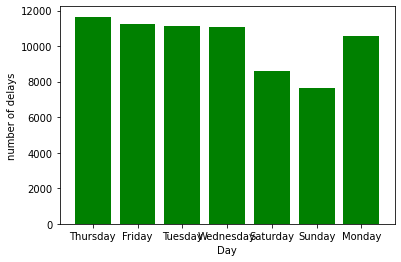

In [28]:
#Visualizations of our data
#Visualize the number of delays based on each day
def visualize_data(df, xVar,yVar='number of delays'):
    delaysOnDays = Counter(df[xVar])
    plt.bar(delaysOnDays.keys(), delaysOnDays.values(), color='g')
    plt.xlabel(xVar)
    plt.ylabel(yVar)
    plt.show()

#visualize data vs number of delays w.r.t days
visualize_data(df,'Day')


```Comment:The numbers of delays get ats its peak on Thursdays.Then, it starts to decrease slowly until Sunday. On Sundays, there is a minimum number of delays.```



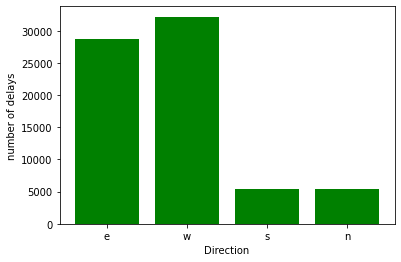

In [29]:
#visualize number of delays w.r.t  directions
visualize_data(df,'Direction')



```
#Comment: More number of delays occur in eastbound and westbound direction of the routes.
```



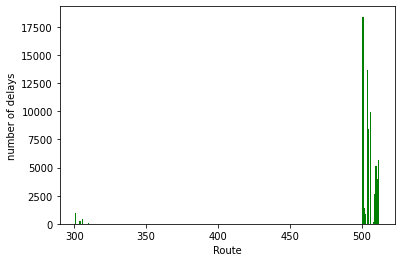

In [30]:
#visualize number of delays with respect to Route
visualize_data(df,'Route')



```Commonet:
The routes that starts with 500 have more number of delays than the routes that start with 300
```



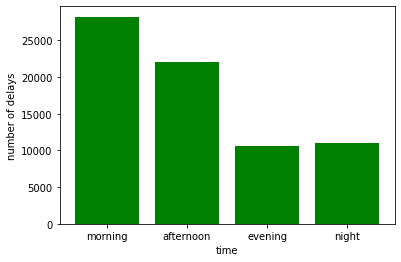

In [31]:
#visualize number of delays with respect to time
visualize_data(df,'time')



```
 The number of delays peak during morning time of the day. 
```



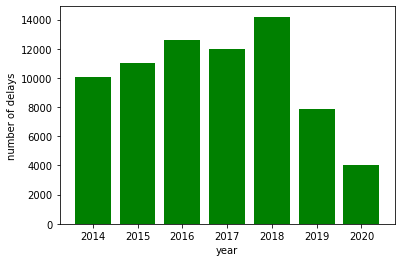

In [32]:
#visualize number of delays with respect to year
visualize_data(df,'year')

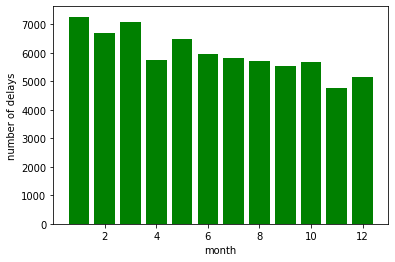

In [33]:
#visualize number of delays with respect to month
visualize_data(df,'month')

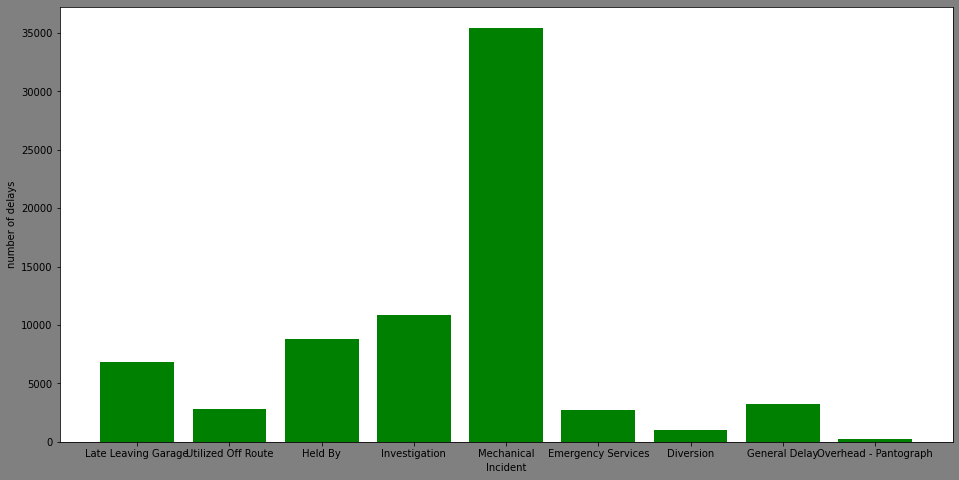

In [34]:
#visualize number of delays with respect to Incidents
plt.figure(figsize=(16,8),facecolor='gray')
visualize_data(df,'Incident')

```# Comment:The mechanical issue is the major cause that  leads to many number of delays of toronto streetcars.```

In [35]:
# for every route/ for every direction[e-w or s-n/ for every year/ for every month/ for every day/ for every hour

south_north_routes = [510,511,512,310]
south_north_direction =['s','n']
east_west_routes = [501,503,504,505,506,508,509,301,304,306]
east_west_direction = ['e','w']

years=[2014,2015,2016,2017,2018,2019,2020]
hours= [i for i in range(1, 25, 1)]
numberOfDaysInMonth = {'1':31,'2':28,'3':31,'4':30,'5':31,'6':30,
                        '7':31,'8':31,'9': 30,'10': 31,'11':30,'12':31}

 
def getAugmentedData(route, direction):
    """ A function that create all the possible streetcar delay data from 2014 to 2020.
    Assuming the streetcars give public service full day, or 24 hours a day.
    """
    data =[]
    for r in route: 
           for d in direction:
            for y in years:
                months= [i for i in range(1, 13)]
                if (y==2020):
                   months= [i for i in range(1, 8)]   # df2020 excel sheet has only 8 months of data records
                for m in months:
                    if (m == 2) and (y == 2016 or y == 2020): # consider leap years cases
                        days  = [i for i in range(1,numberOfDaysInMonth[str(m)]+2)]
                    else:
                        days = [ i for i in range(1,numberOfDaysInMonth[str(m)]+1) ]
                    for day in days:
                        dayName = datetime.date(y, m, day).strftime("%A")
                        for hour in hours:
                            tempDict={"route":r,"direction": d,"year":y,"month":m,"date":day,'time': hour, "day": dayName }

                            data.append(tempDict)
    return data


south_north_data = pd.DataFrame(getAugmentedData(south_north_routes,south_north_direction))

east_west_data =  pd.DataFrame(getAugmentedData(east_west_routes,east_west_direction))
dataList = [south_north_data,east_west_data]
augmented_df = pd.concat(dataList,axis=0,ignore_index=True)
augmented_df

,route,direction,year,month,date,time,day
0,510,s,2014,1,1,1,Wednesday
1,510,s,2014,1,1,2,Wednesday
2,510,s,2014,1,1,3,Wednesday
3,510,s,2014,1,1,4,Wednesday
4,510,s,2014,1,1,5,Wednesday
...,...,...,...,...,...,...,...
1615483,306,w,2020,7,31,20,Friday
1615484,306,w,2020,7,31,21,Friday
1615485,306,w,2020,7,31,22,Friday
1615486,306,w,2020,7,31,23,Friday


In [36]:
df.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,year,month,day_date,time
0,2014-01-02,505,06:31:00,Thursday,dundas and roncesvalles,Late Leaving Garage,4.0,8.0,e,4018.0,2014,1,2,morning
1,2014-01-02,504,12:43:00,Thursday,king and shaw,Utilized Off Route,20.0,22.0,e,4128.0,2014,1,2,morning
2,2014-01-02,501,14:01:00,Thursday,kingston road and bingham,Held By,13.0,19.0,w,4016.0,2014,1,2,afternoon
3,2014-01-02,504,14:22:00,Thursday,king st. and roncesvalles ave.,Investigation,7.0,11.0,w,4175.0,2014,1,2,afternoon
4,2014-01-02,504,16:42:00,Thursday,king and bathurst,Utilized Off Route,3.0,6.0,e,4080.0,2014,1,2,afternoon


In [37]:
new_columns = ['Route','Direction','Report Date','Time']
new_df = df[new_columns] 
new_df.head(5)

def getActualData(df):
    """A function returns the processed/cleaned data that comes from streetcars 
    delay data that is collected over the 6 years.
    """
    processed_df = pd.DataFrame()

    years  = (df['Report Date'].dt.year).ravel()
    hours = [time.hour for time in df['Time']]
    months = (df['Report Date'].dt.month).ravel()
    dates = df['Report Date'].dt.day.ravel()

    day_names = [date(years[i],months[i],dates[i]).strftime("%A") for i in range(0,len(years))]

    processed_df['route'] = df['Route']
    processed_df['direction'] = df['Direction']
    processed_df['year'] = years
    processed_df['month'] = months
    processed_df['date'] = dates
    processed_df['time'] = hours
    processed_df['day'] = day_names
    
    return processed_df 


actual_df = getActualData(new_df)
actual_df.tail(5)


,route,direction,year,month,date,time,day
74122,501,w,2020,7,26,12,Sunday
74123,301,e,2020,7,27,2,Monday
74124,306,e,2020,7,27,2,Monday
74125,504,e,2020,8,3,0,Monday
74126,501,w,2020,8,3,23,Monday


In [38]:
# combining the generated/augmented data with the given/actual data.
merged_df = pd.concat([actual_df,augmented_df])
merged_df.reset_index(drop=True,inplace=True)
merged_df.tail()

,route,direction,year,month,date,time,day
1687349,306,w,2020,7,31,20,Friday
1687350,306,w,2020,7,31,21,Friday
1687351,306,w,2020,7,31,22,Friday
1687352,306,w,2020,7,31,23,Friday
1687353,306,w,2020,7,31,24,Friday


In [39]:
# find duplicates
merged_df['duplicate'] = merged_df.duplicated()
merged_df.shape

(1687354, 8)

In [40]:
# Add targets [ delay = 1, no delay = 0]
# the actual data has 74126 rows. So, they represent the actual delay data given. 
# And they should be label as 1, oherwise label 0.

targets = [1 if i < 74127 else 0 for i in range(0, merged_df.shape[0])]
# merged_df['delay'] = targets

merged_df['label'] = targets
merged_df['duplicate'].value_counts()

False    1627556
True       59798
Name: duplicate, dtype: int64

In [41]:
def removeDuplicateEntries(merged_df):
    """ The augmented data includes all delays and non-delays data. 
        So, remove the data that already exists in the actual data.
    """
    duplicates = []
    for i, duplicate in enumerate(merged_df['duplicate']):
        if (i >= 74127 and duplicate == True):
            duplicates.append('x')
        else:
            duplicates.append(duplicate)
    return duplicates


In [42]:
duplicates = removeDuplicateEntries(merged_df)

In [43]:
merged_df['duplicate'] = duplicates
# Delete these row indexes from dataFrame
index_of_rows = merged_df[merged_df['duplicate'] == 'x'].index
merged_df.drop(index_of_rows , inplace=True)

In [44]:
# since this is a chronological data, let's sort it out by year/month/date/time
merged_df.sort_values(by=['year','month','date','time'], inplace=True)
merged_df.reset_index(drop=True,inplace=True)
# drop the duplicate columns:
merged_df.drop(columns=['duplicate'],inplace=True)
merged_df.head(5)

,route,direction,year,month,date,time,day,label
0,510,s,2014,1,1,1,Wednesday,1
1,510,n,2014,1,1,1,Wednesday,0
2,511,s,2014,1,1,1,Wednesday,0
3,511,n,2014,1,1,1,Wednesday,0
4,512,s,2014,1,1,1,Wednesday,0


In [45]:
    
def encode_features(merged_df):
        """ encode the categorical features into descrete numeric values.
        """
        features = pd.DataFrame()
        ordEncoder = OrdinalEncoder()
        categorical_columns = ['route','direction','year','month','date','time','day']
        for column in merged_df.columns:
            if column in categorical_columns:
                data = np.asarray(merged_df[column]).reshape(-1,1)
                data = ordEncoder.fit_transform(data)
                features[column] = data.ravel()
            else:
                features[column] = merged_df[column]
        return features
# call the function to encode features

processed_features =  encode_features(merged_df)

processed_features.tail()

,route,direction,year,month,date,time,day,label
1636780,1.0,3.0,6.0,6.0,30.0,24.0,0.0,0
1636781,2.0,0.0,6.0,6.0,30.0,24.0,0.0,0
1636782,2.0,3.0,6.0,6.0,30.0,24.0,0.0,0
1636783,7.0,0.0,6.0,7.0,2.0,0.0,1.0,1
1636784,4.0,3.0,6.0,7.0,2.0,23.0,1.0,1


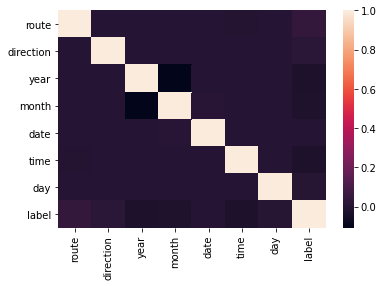

In [46]:
sns.heatmap(processed_features.corr())

In [47]:
# sns.pairplot(processed_features
processed_features.columns

Index(['route', 'direction', 'year', 'month', 'date', 'time', 'day', 'label'], dtype='object')

In [48]:
X_features = processed_features.iloc[:,0:-1]
Y_features = processed_features['label']
X_train,X_test, y_train, y_test = train_test_split(X_features,Y_features,test_size=0.3,random_state=42)

In [49]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((1145749, 7), (491036, 7), (1145749,), (491036,))

In [50]:
processed_features.isna().sum()

route        0
direction    0
year         0
month        0
date         0
time         0
day          0
label        0
dtype: int64

In [46]:

class LazyClassifiers:
    """This class is a class with 9 classifer algorithms. 
    Given  certain features, it predicts the minimum delay of a streetcars. 
    """
    def __init__(self,x_train,x_test,y_train,y_test):
        self.x_train    = np.array(x_train)
        self.x_test     = np.array(x_test)
        self.y_train    = y_train 
        self.y_test     = y_test
        self.score      = 0
        self.f1_score   = 0 
        self.recall     = 0
        self.precision  = 0
        self.n_features = x_train.shape[1]
        self.accuracy   = 0
        self.precison   = 0
        self.recall     = 0
        self.f1score    = 0
        self.cm = None
        self.coeficientOfDetermination = 0
        self.history = None

    def metrics(self):
        ''' reports the performance of a models using three metrics'''
        # calculate absolute mean errors
        self.accuracy = accuracy_score(self.y_test, self.y_pred)
        print('Accuracy = {:.3f}%'.format(self.accuracy*100))

        # calculate root mean squared errors
        self.precison = precision_score(self.y_test, self.y_pred, zero_division=1)
        print('Precision Accuracy = {:.3f}%'.format(self.accuracy*100))
        self.recall = recall_score(self.y_test, self.y_pred, zero_division=1)
        print('Recall Accuracy = {:.3f}%'.format(self.recall*100))

        self.f1score = f1_score(self.y_test, self.y_pred)
        print('f1score = {:.3f}%'.format(self.f1score*100))
        self.cm = confusion_matrix(self.y_test,self.y_pred)
        self.cm = pd.DataFrame(self.cm, index = ['NO DELAY', 'DELAY'],columns = ['NO DELAY', 'DELAY'])
        plt.figure(figsize = (10,7))
        plt.title("Confusion Matrix")
        sns.heatmap(self.cm, annot=True)
        plt.show()
        print('\n')

    def plot_model_performance(self,history):
        # report deep neural network model performance
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
        
    def logistic_reg_model(self):
        '''linear classifer model'''
        #create logistic regression model
        self.logistic_reg_model = LogisticRegression()
        # Train the model using the training sets
        self.logistic_reg_model.fit(self.x_train, self.y_train)
        # Make predictions using the testing set
        self.y_pred = self.logistic_reg_model.predict(self.x_test)

        print('The output of logistic regression model:')
        # report the metrics
        self.metrics()

    def decision_tree_classifier(self):
        '''decision tree  model'''
        self.dt_model = DecisionTreeClassifier(random_state=0)
        #training the model with training sets
        self.dt_model.fit(self.x_train , self.y_train)
        # Make predictions using the testing set
        self.y_pred = self.dt_model.predict(self.x_test)

        print('\nThe output of decision tree  model:')
        # The coefficients
        # print('Coefficients:', self.dt_model.feature_importances_)
        # print the metrics
        self.metrics()

    def svm_classifier(self):
        '''support vector machine model'''
        self.svm_model = SVC()
        #training themodel with the training sets
        self.svm_model.fit(self.x_train , self.y_train)
        # making predictions
        self.y_pred = self.svm_model.predict(self.x_test)

        print('\nThe output of support vector machine model:')
        # The coefficients
        #print('Coefficients: \n', sv_reg_model.feature_importances_)
        # report metrics
        self.metrics()
    
    def knn_classifier(self):
        '''k neighbours classifier model'''
        self.knn_model = KNeighborsClassifier()
        #training the model with training sets
        self.knn_model.fit(self.x_train , self.y_train)
        #making predictions
        self.y_pred = self.knn_model.predict(self.x_test)
        print('\nThe output of k neighbours classifier model:')
        self.metrics()

    def random_forest_classifier(self):
        '''random forest classifier model'''
        self.rf_model = RandomForestClassifier(random_state=0)
        #training the model with training sets
        self.rf_model.fit(self.x_train , self.y_train)
        #making predictions
        self.y_pred = self.rf_model.predict(self.x_test)

        print('The output of random forest classifier model:')
        # The coefficients
        # print('Coefficients:', self.rf_model.feature_importances_)
        #report metrics
        self.metrics()
        # self.plot_model_performance()

    def adaboost_classifier(self):
        '''adaboost classifier model'''
        self.adaboost_model = AdaBoostClassifier()
        #training the model with training sets
        self.adaboost_model.fit(self.x_train , self.y_train)
        #making predictions
        self.y_pred = self.adaboost_model.predict(self.x_test)

        print('\nThe output of adaboost classifier model:')
        # The coefficients
        # print('Coefficients: ', self.adaboost_model.feature_importances_)
        # report metrics and plot performance
        self.metrics()
        # self.plot_model_performance()
        
    def gradboost_classifier(self):
        '''gradient boost  model'''
        self.gradboost_model = GradientBoostingClassifier()
        #training the model with training sets
        self.gradboost_model.fit(self.x_train , self.y_train)
        #making predictions
        self.y_pred = self.gradboost_model.predict(self.x_test)

        print('\nThe output of gradient boost model:')
        # The coefficients
        # print('Coefficients:', self.gradboost_model.feature_importances_)
        # report metrics 
        self.metrics()


    def xgboost_classifier(self):
        '''x/extreme gradient boost classifier model'''
        self.xgb_model = XGBClassifier()
        #training the model with training sets
        self.xgb_model.fit(self.x_train , self.y_train)
        #making predictions
        self.y_pred = self.xgb_model.predict(self.x_test)

        print('\nThe output of xgboost classifier model:')
        # The coefficients
        # print('Coefficients:', self.xgb_model.feature_importances_)
        
        # report the metrics and plot the performance
        self.metrics()
        # self.plot_model_performance()

    def dnn_classifier(self,epoch = 20):
        '''deep neural networks classifier model'''
        self.n_features = self.x_train.shape[1]
        self.epoch = epoch
        self.data_normalizer = preprocessing.Normalization(input_shape=[self.n_features,])
        self.data_normalizer.adapt(self.x_train)

        # build the model
        self.dnn_model = tf.keras.Sequential([self.data_normalizer,
                                            layers.Dense(32, activation='relu'),
                                            layers.Dense(16, activation='relu'),
                                           layers.Dense(4, activation='relu'),
                                            layers.Dense(1,activation='sigmoid')
        ])

        #compile the model
        self.dnn_model.compile(
                optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
        print("The deep neural networks model's architecture: ", self.dnn_model.summary())

        self.history = self.dnn_model.fit(self.x_train, self.y_train, validation_split=0.2,verbose=0, epochs=self.epoch)

        self.test_loss = self.dnn_model.evaluate(self.x_test, self.y_test, verbose=1)
        print(f'test loss {self.test_loss}')

        self.y_pred = self.dnn_model.predict(self.x_test).flatten()
        self.y_pred =  np.where(self.y_pred < 0.5, 0, 1)
        # report the metrics and model's performance
        self.metrics()
        #report the model's training and validation loss
        self.plot_model_performance(self.history)

The output of logistic regression model:
Accuracy = 95.448%
Precision Accuracy = 95.448%
Recall Accuracy = 0.000%
f1score = 0.000%


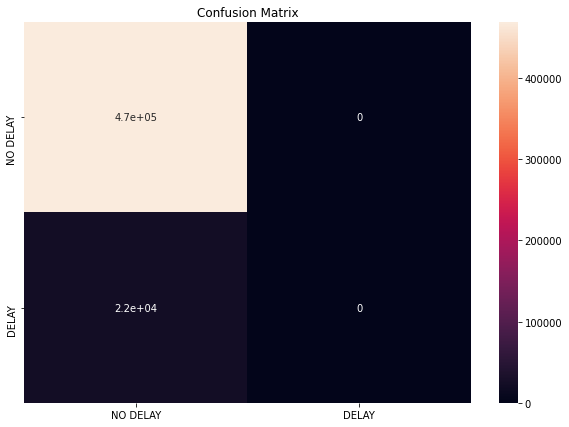

In [47]:
lazyClassifier = LazyClassifiers(X_train,X_test, y_train, y_test)
lazyClassifier.logistic_reg_model()

Observation: There is a huge classes inbalance in this data sets, sinces there are around 70k entries of actual street cars delay data and around 1.5 million entries of no-delay data. The model accuracy is so high, accroding to logistic regression output, however, f1_score of the model is 0. Which means this model is not doing a good job at predicting. So, this can be solved using random oversampling or random undersampling.





The output of k neighbours classifier model:
Accuracy = 95.418%
Precision Accuracy = 95.418%
Recall Accuracy = 11.252%
f1score = 18.273%


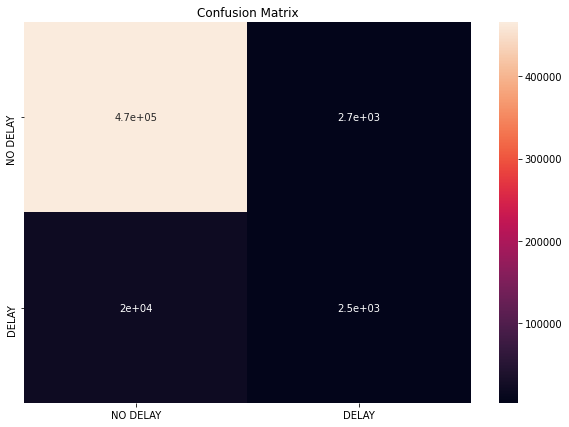

In [48]:
lazyClassifier.knn_classifier()

Observation: The perfomance of knn tree classifier, despite data/class imbalance, is much better than logistic regression. As it can be seen, the f1 score of logistic regression was 0, but ther f1_score of the decision tree is ~0.18,still low, but better than logistic regression considering the imbalance data problems. 


The output of decision tree  model:
Accuracy = 94.102%
Precision Accuracy = 94.102%
Recall Accuracy = 45.938%
f1score = 41.489%


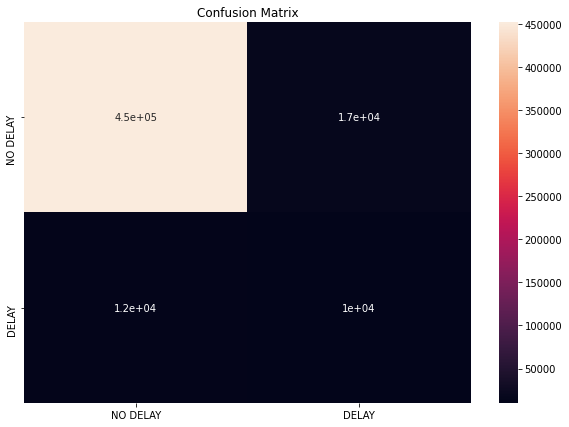

In [49]:
lazyClassifier.decision_tree_classifier()

The output of random forest classifier model:
Accuracy = 96.791%
Precision Accuracy = 96.791%
Recall Accuracy = 38.820%
f1score = 52.415%


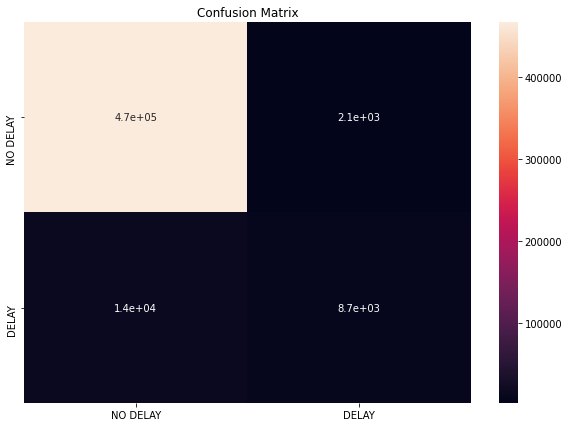

In [50]:
lazyClassifier.random_forest_classifier()

Observation 3: Random Forest classifier,consists of multiple decision tree, gives better perfomrance than decision tree.And, we can easily see that from based on the f1 score = ~0.52.


The output of adaboost classifier model:
Accuracy = 95.539%
Precision Accuracy = 95.539%
Recall Accuracy = 1.991%
f1score = 3.904%


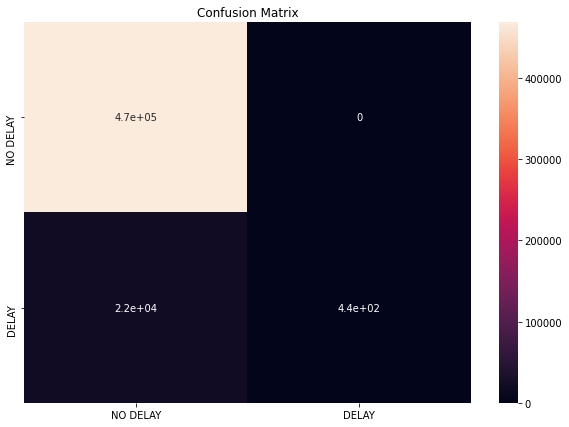

In [51]:
lazyClassifier.adaboost_classifier()


The output of gradient boost model:
Accuracy = 96.053%
Precision Accuracy = 96.053%
Recall Accuracy = 13.292%
f1score = 23.465%


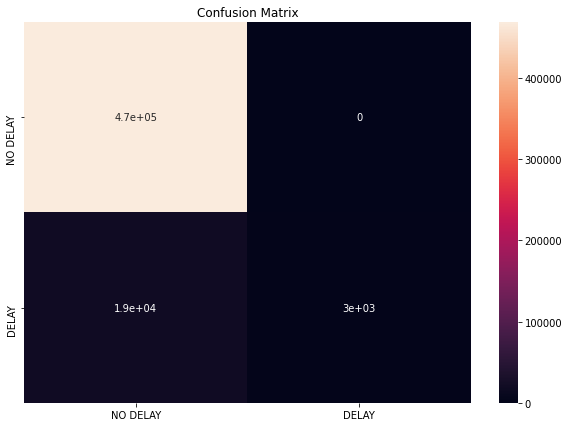

In [52]:
lazyClassifier.gradboost_classifier()


The output of xgboost classifier model:
Accuracy = 95.859%
Precision Accuracy = 95.859%
Recall Accuracy = 9.028%
f1score = 16.561%


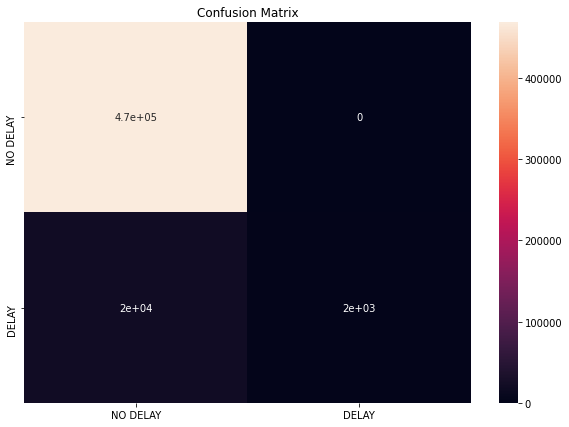

In [53]:
lazyClassifier.xgboost_classifier()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 7)                 15        
_________________________________________________________________
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 872
Trainable params: 857
Non-trainable params: 15
_________________________________________________________________
The deep neural networks model's architecture:  None
15345/15345 [==============================] - 34s 2ms/step - loss: 0.

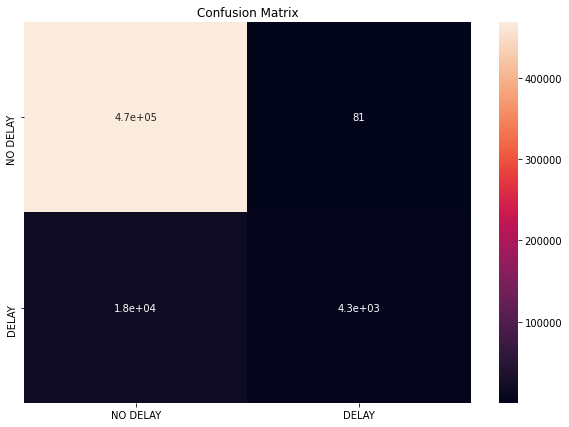

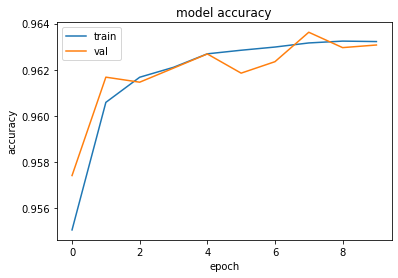

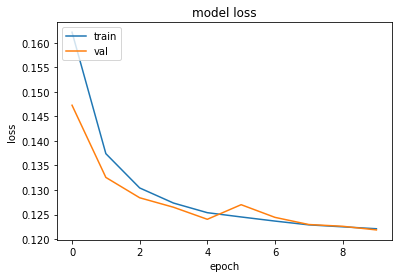

In [54]:
lazyClassifier.dnn_classifier(epoch=10)

In [55]:
#lazyClassifier.svm_classifier()   

##Conclusion 1: 

---
 The predictive performance of random forest(first), decision tree(second), and xgboost algorithms(the third best) are the best compared to  other algorithms. We can see the  recall and f1 score is imporved. It seems that random forest or Decision tree, the XGBoost give better results with extremely imbalance data. 

###PS
---
 The output/result of svm was similar and slightly better than logistic regression,but it takes a long time to run, so I commented it to avoid extremely long running time .

Conclusion 2:
---
 As it is shown from the *```accuracy and f1 score, or from the Confusion Matrix```* of different models, random forest algorithm's model outperformed all the other models' predictive accuaracies. Even with extreme data(class) imbalance, it has achieved f1_score of ~0.52.  Hence, from all the models, we can conclude that, Random Forest, Decision Tree, and XGBoost are the best classifiers with this imbalance data. So, in the next steps, since I have class imbalance,it has to be addressed, and it can be handled in two ways: Oversampling(the minority class) or Undersampling(the majority class) and once I get a balanced data, I can build a robust model. Since, oversampling is increasing the minority data by duplicatation or interpolation and it may add another unneeded features to my data sets. However, that is not the main issue that I do not want to use oversampling. Oversampling will increase my data size and , currently with the 1.68 Million rows of data, my data is extremely big and each model takes quiet some time. Therefore, to avoid a lot of time for traing,  I prefer to use undersampling.Anyway, I will use undersampling technique to balance my data as well as reduce my data at the same time to facilitate the process. Nonetheless, one can use undersampling, oversampling or combination of both techniques to create a good data set and build a robust model.

# `****Undersampling Technique to balance my Datasets`

In [51]:
# define undersample strategy
randomUnderSampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_undersampled, Y_undersampled = randomUnderSampler.fit_resample(X_features, Y_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [52]:
# the majority class is undersampled, let's see the shape of the data
X_undersampled.shape, Y_undersampled.shape

((148254, 7), (148254,))

```After applying undersampling technique, my data size is reduced by a lot, from ~ 1.68 Million entries to 148,254 rows.```

In [53]:
# spliting to training and testing data from the unsersampled data set
X_train,X_test, y_train, y_test = train_test_split(X_undersampled,Y_undersampled,test_size=0.3,random_state=42)

The output of logistic regression model:
Accuracy = 54.610%
Precision Accuracy = 54.610%
Recall Accuracy = 54.266%
f1score = 54.564%


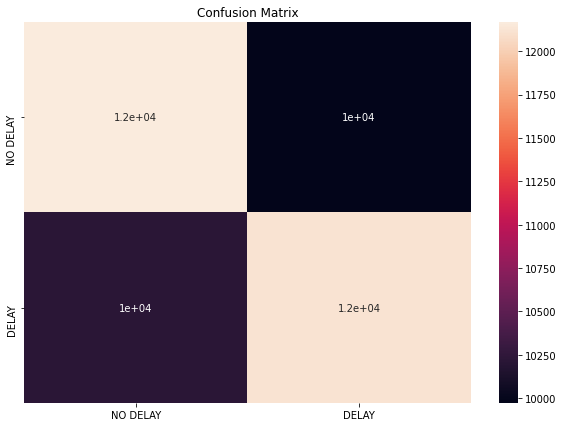

In [59]:
# Now, let's create lazyClassifier object to run all the classifiers when the data is balanced 
lazyClassifier2 = LazyClassifiers(X_train,X_test,y_train, y_test)
lazyClassifier2.logistic_reg_model()

Comment: The predictive accuracy of the logistic regression model has improved well after undersampling is performed. The accuracy has been decreased from 96% to around 54.5%, but it is noticable that , from the confusion matrix.Also, f1 score of the model is improved,and it has performed well at classifying class 1 now than it did before the undersampling.


The output of k neighbours classifier model:
Accuracy = 71.169%
Precision Accuracy = 71.169%
Recall Accuracy = 75.898%
f1score = 72.560%


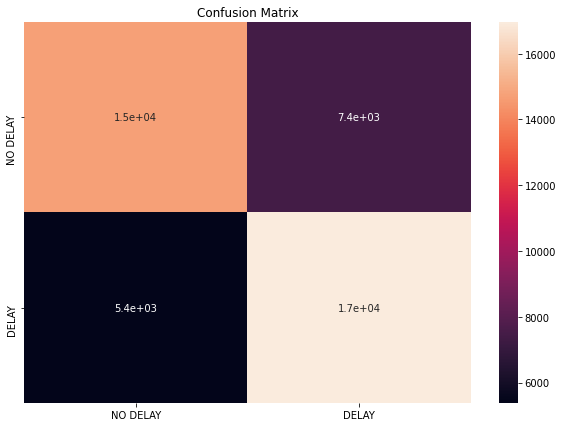

In [60]:
lazyClassifier2.knn_classifier()


The output of decision tree  model:
Accuracy = 77.885%
Precision Accuracy = 77.885%
Recall Accuracy = 78.337%
f1score = 78.061%


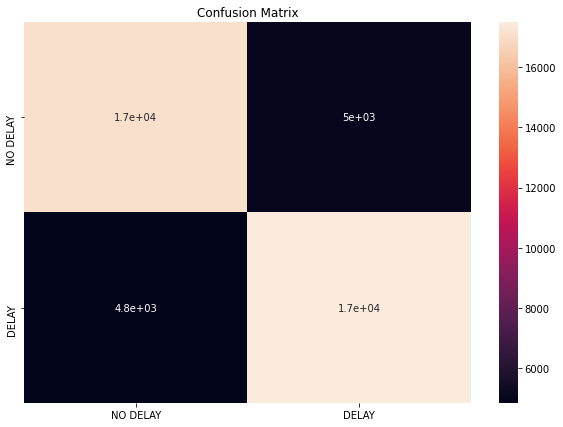

In [61]:
lazyClassifier2.decision_tree_classifier()

The output of random forest classifier model:
Accuracy = 82.103%
Precision Accuracy = 82.103%
Recall Accuracy = 84.444%
f1score = 82.577%


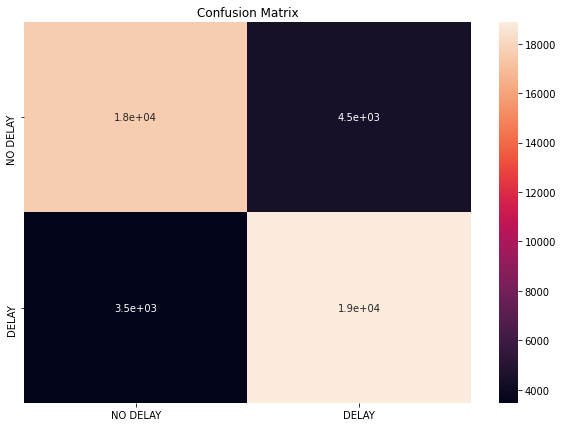

In [62]:
lazyClassifier2.random_forest_classifier()


The output of adaboost classifier model:
Accuracy = 77.406%
Precision Accuracy = 77.406%
Recall Accuracy = 87.049%
f1score = 79.466%


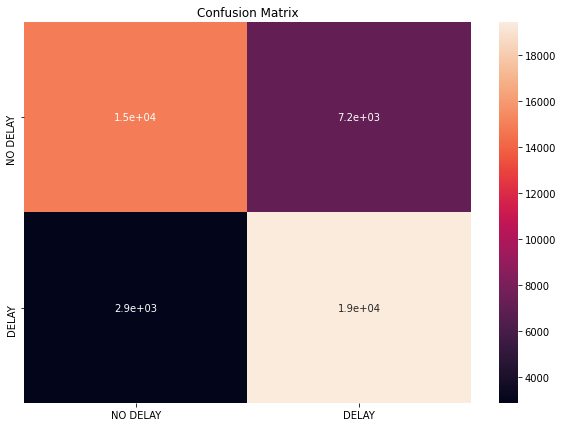

In [63]:
lazyClassifier2.adaboost_classifier()


The output of gradient boost model:
Accuracy = 81.188%
Precision Accuracy = 81.188%
Recall Accuracy = 86.189%
f1score = 82.150%


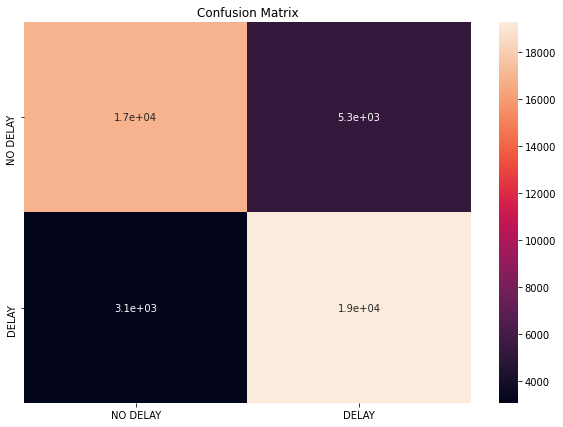

In [64]:
lazyClassifier2.gradboost_classifier()


The output of xgboost classifier model:
Accuracy = 81.033%
Precision Accuracy = 81.033%
Recall Accuracy = 86.118%
f1score = 82.017%


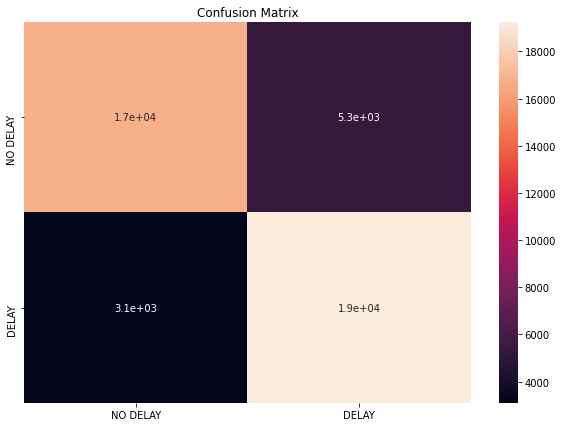

In [65]:
lazyClassifier2.xgboost_classifier()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 7)                 15        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 872
Trainable params: 857
Non-trainable params: 15
_________________________________________________________________
The deep neural networks model's architecture:  None
1390/1390 [==============================] - 3s 2ms/step - loss: 0.3

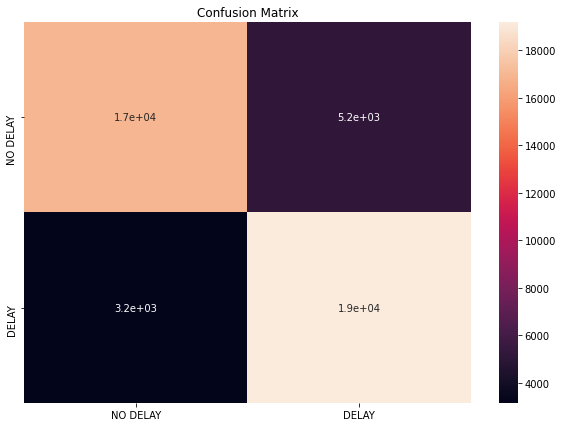

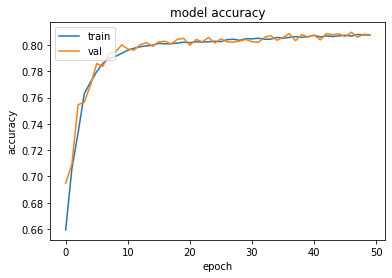

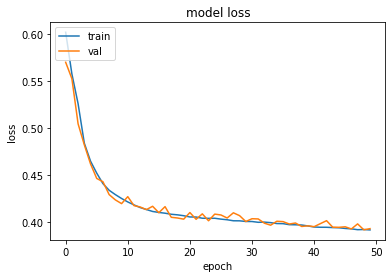

In [66]:
lazyClassifier2.dnn_classifier(epoch=50)

In [67]:
# lazyClassifier2.svm_classifier()

Comment: The training and validation loss of the graph shows that the deep neural network model is fitting well.

Comment: After performing undersampling, the preformance of the models have imporved well. The accuracy of the logistic regression has been improved, but still it is low relative to the other models. However, the predictive accuracy of the neural model has changed drastically. When the data was unblanced, it was the worst model at making preditions, but after the undersampling is performed, the deep neural netwok  model become the second/third best model at making good preditions. The DNN classifier's accuracy, precision, recall, and f1 scores become above 81%. So,the top three models with good accuracies are: (1) Random Forest (accuracy = 82.5%).
(2). XGBoost( all accuracy, precision, recall, and f1 >= ~81.5%) (3) deep neural network and Gradient Boost( almost the same results, accuracy = ~81.2%, f1 score = 81.2%).So, In the next step, I will be applying hyperparameter tuning to three Random Forest, XGBoost and Deep Neural Network. Note that, I could have picked gradient boost instead of Deep Neural networks since they both have the same results/accuracy, but since XGBoost(extreme gradient boosting) is very much similar to Gradient boosting, I will leave Gradient boosting algorithm out, and I will tune otheer three models to see if I can even get a better results.

## Fine-Tuning Models &  Cross Validation







In [54]:

def dnn_classifier(optimizer='adam'):

    '''deep neural networks classifier model'''
    n_features = 7
    # build the model
    dnn_model = tf.keras.Sequential()
    dnn_model.add(Dense(32,input_dim = n_features, activation='relu'))
    dnn_model.add(Dense(16, activation='relu'))
    dnn_model.add(Dense(4, activation='relu'))
    dnn_model.add(Dense(1, activation='sigmoid'))

    #compile the model
    dnn_model.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy']
            
    )

    return dnn_model


In [55]:
def metrics(y_test,y_pred):
    #  New Model Evaluation metrics 
    print('Accuracy Score: {:.3f}%'.format(accuracy_score(y_test,y_pred)*100))
    print('Precision Score: {:.3f}%'.format(precision_score(y_test,y_pred)*100))
    print('Recall Score: {:.3f}%'.format(recall_score(y_test,y_pred)*100))
    print('F1 Score: {:.3f}% '.format(f1_score(y_test,y_pred)*100))
    cm = confusion_matrix(y_test,y_pred)
    cm = pd.DataFrame(cm, index = ['NO DELAY', 'DELAY'], columns = ['NO DELAY', 'DELAY'])
    plt.figure(figsize = (10,7))
    plt.title("Confusion Matrix")
    sns.heatmap(cm, annot=True)
    plt.show()

In [75]:
# create model
def tune_deep_nn_model(X_train,X_test,y_train,y_test):
    """it finds the best batch size, epochs,
    optimizers that gives good accuracy,
     and returns those parameters
    """

    # create a model 
    model = KerasClassifier(build_fn=dnn_classifier)
    # define batch sizes as a gridsearch parameters
    batches = [None,100]
    epochs =  [20,50]
    optimizers = ['Adam','SGD','RMSProp','Adagrad']

    grid_parameters = dict(batch_size=batches,epochs=epochs,optimizer=optimizers)
    gridSearch = GridSearchCV(model,param_grid=grid_parameters,n_jobs = -1, cv = 2)
    grid_model = gridSearch.fit(X_train,y_train,verbose=1)
       
    predictions = grid_model.predict(X_test).flatten()
    y_pred =  np.where(predictions < 0.5, 0, 1)
    #report metrics
    metrics(y_test,y_pred)
    
    return  grid_model.best_params_



Epoch 1/50
3244/3244 [==============================] - 10s 3ms/step - loss: 0.6773 - accuracy: 0.5841
Epoch 2/50
3244/3244 [==============================] - 9s 3ms/step - loss: 0.5891 - accuracy: 0.6641
Epoch 3/50
3244/3244 [==============================] - 9s 3ms/step - loss: 0.5597 - accuracy: 0.6919
Epoch 4/50
3244/3244 [==============================] - 9s 3ms/step - loss: 0.5488 - accuracy: 0.6978
Epoch 5/50
3244/3244 [==============================] - 9s 3ms/step - loss: 0.5386 - accuracy: 0.7073
Epoch 6/50
3244/3244 [==============================] - 9s 3ms/step - loss: 0.5359 - accuracy: 0.7089
Epoch 7/50
3244/3244 [==============================] - 9s 3ms/step - loss: 0.5330 - accuracy: 0.7083
Epoch 8/50
3244/3244 [==============================] - 9s 3ms/step - loss: 0.5291 - accuracy: 0.7112
Epoch 9/50
3244/3244 [==============================] - 9s 3ms/step - loss: 0.5249 - accuracy: 0.7188
Epoch 10/50
3244/3244 [==============================] - 9s 3ms/step - loss: 0.52

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy Score: 80.759%
Precision Score: 78.349%
Recall Score: 85.245%
F1 Score: 81.652% 


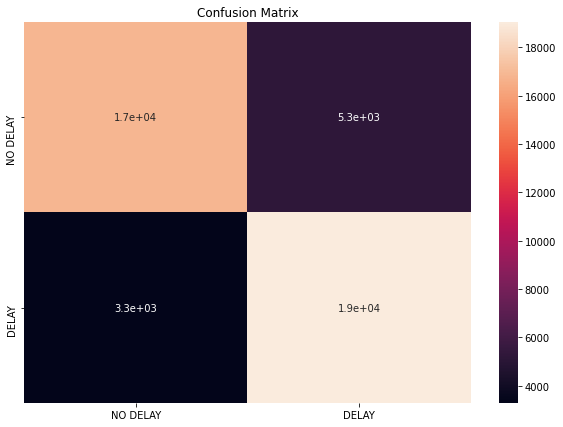

In [76]:
dnn_best_parameters = tune_deep_nn_model(X_train,X_test, y_train, y_test)

In [77]:
dnn_best_parameters

{'batch_size': None, 'epochs': 50, 'optimizer': 'Adam'}

Comment:
---
It is very time consuming, and takes a long time to do a grid search tuning with ```batch_size and epochs,and optimizers. Therefore, I used them in sequence, but the output of the model has not improved.```
And I think that is the reason I have got an accuracy of around 76%, which worst than the one I found without tuning the model. However, I can take all the best parameters I found by tuning and use them at the same time to find a better result.

In [60]:

def tune_random_forest_model(X_train, X_test, y_train,y_test):
    # define models and parameters
    rf_model = RandomForestClassifier()
    n_estimators = [10, 100,1000]
    max_depth = [7,9]
    # define grid search
    grid_parameters = dict(n_estimators=n_estimators,max_depth=max_depth)
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
    grid_search = GridSearchCV(estimator=rf_model, param_grid=grid_parameters, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0,verbose=1)
    grid_model = grid_search.fit(X_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_model.best_score_, grid_model.best_params_))
    y_pred = grid_model.predict(X_test)
    # New Model Evaluation metrics 
    metrics(y_test,y_pred)
    return grid_model.best_params_

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.8min finished


Best: 0.794743 using {'max_depth': 9, 'n_estimators': 1000}
Accuracy Score: 79.922%
Precision Score: 76.228%
Recall Score: 87.224%
F1 Score: 81.356% 


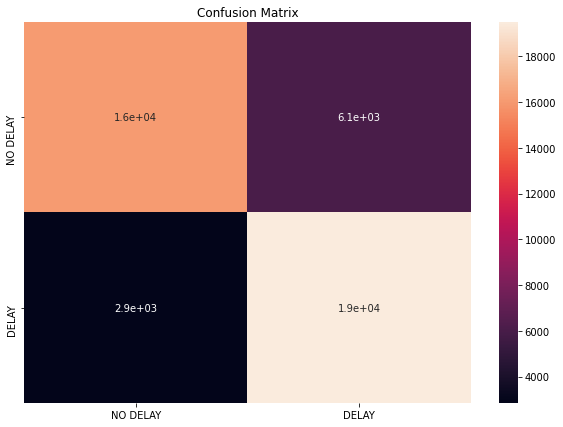

{'max_depth': 9, 'n_estimators': 1000}

In [61]:
random_forest_parameters = tune_random_forest_model(X_train, X_test, y_train,y_test)
random_forest_parameters

In [66]:
def tune_xgboost_model(X_train, X_test, y_train,y_test):

    # define models and parameters
    xgb_model = XGBClassifier()
    n_estimators = [100,1000]
    learning_rate = [ 0.01, 0.1]
    subsample = [0.7, 1.0]
    max_depth = [ 7,9]
    # define grid search
    grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0,verbose=1)
    grid_model = grid_search.fit(X_train, y_train)
    y_pred = grid_model.predict(X_test)
    # report metrics
    metrics(y_test,y_pred)
    # summarize results
    print("Best: %f using %s" % (grid_model.best_score_, grid_model.best_params_))
    return grid_model.best_params_

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 16.2min finished


Accuracy Score: 82.984%
Precision Score: 80.291%
Recall Score: 87.631%
F1 Score: 83.801% 


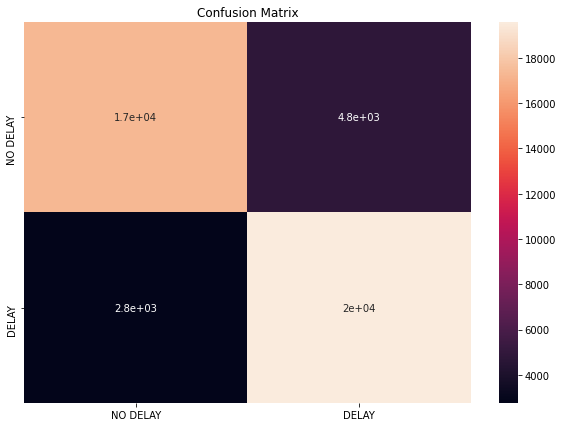

Best: 0.822677 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.7}


{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.7}

In [67]:
xgb_parameters = tune_xgboost_model(X_train, X_test, y_train,y_test)
xgb_parameters

In [80]:

def votingClassifiers(X_train, X_test, y_train,y_test,n_estimators=10,max_depth=9,subsample=0.7,lr=0.01,rf_n_estimators=10,rf_depth=7):
    '''a voting/enseble classifier where two best and tuned models are combined to build to make an accurate prediction.'''

    random_forest_model = RandomForestClassifier(n_estimators=rf_n_estimators, max_depth=rf_depth)
    xgboost_model = XGBClassifier(n_estimators=n_estimators, learning_rate=lr, max_depth=max_depth,subsample=subsample)
    
    # y_pred_cnn = cnn_classifier(X_train,y_train,X_test)
    models = [('fr',random_forest_model),('xgb',xgboost_model)]
    # create the ensemble model
    ensemble = VotingClassifier(estimators=models,voting='soft')
    ensemble.fit(X_train,y_train)
    
    y_pred = ensemble.predict(X_test)
    # y_pred = ensemble.predict_proba(X_test)
    # New Model Evaluation metrics 
    metrics(y_test,y_pred)


In [81]:
# the the tuned parameters form XGBoost Model
best_learning_rate = xgb_parameters['learning_rate']
best_max_depth     = xgb_parameters['max_depth']
best_subsample     = xgb_parameters['subsample']
best_n_estimators  = xgb_parameters['n_estimators']
rf_n_trees         =  random_forest_parameters['n_estimators']
rf_max_depth       = random_forest_parameters['max_depth']

In [82]:
# get the tuned parameters form random forest
best_learning_rate = xgb_parameters['learning_rate']
best_max_depth     = xgb_parameters['max_depth']
best_subsample     = xgb_parameters['subsample']
best_n_estimators  = xgb_parameters['n_estimators']
rf_n_trees         =  random_forest_parameters['n_estimators']
rf_max_depth       = random_forest_parameters['max_depth']


Accuracy Score: 82.847%
Precision Score: 80.071%
Recall Score: 87.667%
F1 Score: 83.697% 


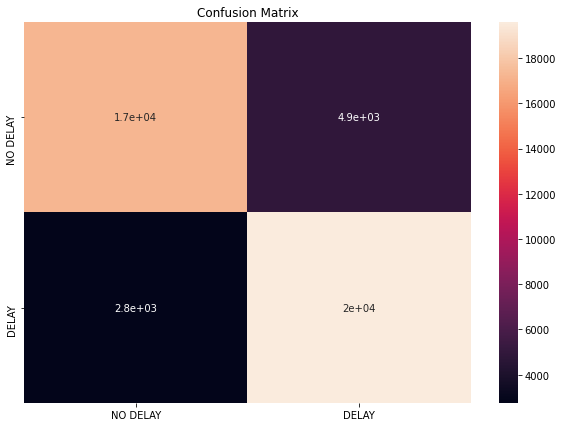

In [83]:
votingClassifiers(X_train, X_test, y_train,y_test,n_estimators=best_n_estimators,
                  max_depth=best_max_depth,subsample=best_subsample,
                  lr=best_learning_rate,rf_n_estimators=rf_n_trees,rf_depth=rf_max_depth
                  
                )

**Conclusion:**
------
```In conclusion, I think that the DNN model, XGBoost, and Random Forest models could be really tuned to get very good results. However, they require a lot of time.So, for now, this should be enough.Overall, it was a good project to learn a lot of concepts[covered in class] at once.```

